In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from pandas.plotting import scatter_matrix

start = datetime.datetime(2009, 11, 11)
end = datetime.datetime(2019, 11, 11)
total_investment_amount = 34313.76

#Consumer Staples: Discretionary
cag = web.DataReader("CAG", "yahoo", start, end)
ccl = web.DataReader("CCL", "yahoo", start, end)
low = web.DataReader("LOW", "yahoo", start, end)
pep = web.DataReader("PEP", "yahoo", start, end)
sbux = web.DataReader("SBUX", "yahoo", start, end)
tjx = web.DataReader("TJX", "yahoo", start, end)

#EMI
ba = web.DataReader("BA", "yahoo", start, end)
glw = web.DataReader("GLW", "yahoo", start, end)
ip = web.DataReader("IP", "yahoo", start, end)
mlm = web.DataReader("MLM", "yahoo", start, end)
unp = web.DataReader("UNP", "yahoo", start, end)
xel = web.DataReader("XEL", "yahoo", start, end)

#financials
allstate = web.DataReader("ALL", "yahoo", start, end)
bx = web.DataReader("BX", "yahoo", start, end)
ice = web.DataReader("ICE", "yahoo", start, end)
jpm = web.DataReader("JPM", "yahoo", start, end)
pnc = web.DataReader("PNC", "yahoo", start, end)
V = web.DataReader("V", "yahoo", start, end)

#healthcare
abbv = web.DataReader("ABBV", "yahoo", start, end)
cvs = web.DataReader("CVS", "yahoo", start, end)
hca = web.DataReader("HCA", "yahoo", start, end)
mdt = web.DataReader("MDT", "yahoo", start, end)
pfe = web.DataReader("PFE", "yahoo", start, end)
pld = web.DataReader("PLD", "yahoo", start, end)
shpg = web.DataReader("SHPG", "yahoo", start, end)
unh = web.DataReader("UNH", "yahoo", start, end)

#Telecomm
adbe = web.DataReader("ADBE", "yahoo", start, end)
baba = web.DataReader("BABA", "yahoo", start, end)
crm = web.DataReader("CRM", "yahoo", start, end)
dis = web.DataReader("DIS", "yahoo", start, end)
nvda = web.DataReader("NVDA", "yahoo", start, end)
on = web.DataReader("ON", "yahoo", start, end)
vz = web.DataReader("VZ", "yahoo", start, end)

In [23]:
#non-discretionary
phm = web.DataReader("PHM", "yahoo", start, end)
mu = web.DataReader("MU", "yahoo", start, end)
ffiv = web.DataReader("FFIV", "yahoo", start, end)
pnw = web.DataReader("PNW", "yahoo", start, end)
sna = web.DataReader("SNA", "yahoo", start, end)
cmi = web.DataReader("CMI", "yahoo", start, end)
cof = web.DataReader("COF", "yahoo", start, end)
nue = web.DataReader("NUE", "yahoo", start, end)
regn = web.DataReader("REGN", "yahoo", start, end)
bwa = web.DataReader("BWA", "yahoo", start, end)

In [20]:
for stock_df in (cag, ccl, low, pep, sbux, tjx, ba, glw, ip, mlm, unp, xel, allstate, bx, ice, jpm, pnc, V, abbv, cvs, hca, mdt, pfe, pld, shpg, unh, adbe, baba, crm, dis, nvda, on, vz):
    stock_df['Normed Return'] = stock_df['Adj Close'] / stock_df.iloc[0]['Adj Close']

In [32]:
for stock_df,allow in zip([phm, mu, ffiv, pnw, sna, cmi, cof, nue, regn, bwa],[.0258,.0250,.0230,.0216,.0215,.0213,.0208,.0203,.02,.0199]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allow

In [35]:
for stock_df in (phm, mu, ffiv, pnw, sna, cmi, cof, nue, regn, bwa):
    stock_df['Position Value'] = stock_df['Allocation'] * total_investment_amount

In [38]:
portfolio_val = pd.concat([phm['Position Value'], mu['Position Value'], ffiv['Position Value'], pnw['Position Value'], sna['Position Value'], cmi['Position Value'], cof['Position Value'], nue['Position Value'], regn['Position Value'], bwa['Position Value']],axis=1)

In [39]:
portfolio_val.columns = ['PHM Pos','MU Pos', 'FFIV Pos', 'PNW Pos','SNA Pos', 'CMI Pos', 'COF Pos','NUE Pos','REGN Pos', 'BWA Pos']

In [41]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [42]:
portfolio_val

,PHM Pos,MU Pos,FFIV Pos,PNW Pos,SNA Pos,CMI Pos,COF Pos,NUE Pos,REGN Pos,BWA Pos,Total Pos
Date,,,,,,,,,,,
2009-11-11,885.295008,857.844000,789.216480,741.177216,737.745840,730.883088,713.726208,696.569328,686.275200,682.843824,7521.576192
2009-11-12,846.352432,868.110767,780.141183,730.147811,724.722513,718.853493,690.859283,682.288435,687.723766,670.314520,7399.514204
2009-11-13,838.563826,856.703278,812.812063,733.015405,730.467815,724.405563,698.601659,685.985007,672.513443,668.852934,7421.920994
2009-11-16,849.814025,871.532987,823.042387,741.397920,738.895095,753.246052,718.227071,705.810055,714.160735,676.161468,7592.287795
2009-11-17,830.775402,880.658978,821.062288,738.309622,730.659195,748.156415,729.210800,709.506145,721.765931,676.579237,7586.684013
...,...,...,...,...,...,...,...,...,...,...,...
2019-11-05,3639.726289,5553.171049,2415.335726,2975.749335,3898.260223,3477.651956,2036.946222,1275.868098,12045.125410,2046.351112,39364.185421
2019-11-06,3692.021499,5439.096049,2440.581392,2988.533433,3869.035223,3505.870683,2031.503071,1268.277710,11751.420791,2035.451696,39021.791547
2019-11-07,3617.857548,5521.230188,2435.796121,2878.721185,3872.746391,3527.904369,2045.319917,1277.018133,11820.230267,2087.677769,39084.501888


Text(0.5, 1.0, 'Total Portfolio Value')

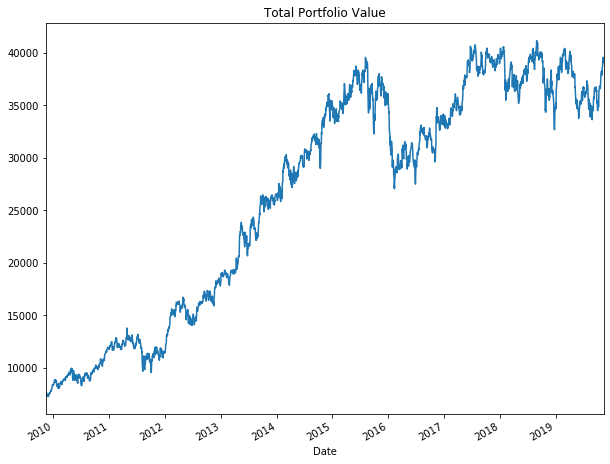

In [43]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

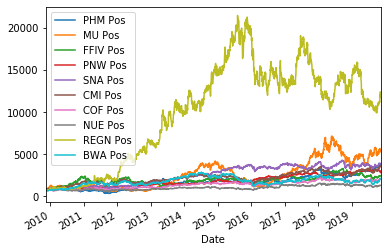

In [44]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

Daily Return

In [45]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

Cumulative Return

In [48]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print(f'Our return {cum_ret}%!')

Our return 423.14752243965296%!


In [49]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [50]:
SR

0.05154252147553175